In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sm

In [35]:
shre_data = pd.read_csv("SHRE_INTERVENTION_DATA_EJAF.csv")
# Display the first few rows to see the structure
shre_data.head()

,QTR,Org,State,Location,LGA,Start Date (dd/mm/yy),MONTH,Group Name,Offered HTS,Tested for HIV,...,Unique ID,Sex (F/Male),Key Population,Age,First Name/Given Name,Last Name/Family Name,Participant Name,Condom,Lube,Sampled for Post Test (Y/N)
0,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Not Tested,...,SHRE/AB/ABA/00002,M,TG,23,Courage,Nweke,Courage Nweke,Received,Received,Y
1,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Not Tested,...,SHRE/AB/ABA/00004,M,MSW,25,Chukwuemeka,Umatu,Chukwuemeka Umatu,Received,Received,Y
2,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Tested,...,SHRE/AB/ABA/00005,M,MSW,21,Christopher,Godshoney,Christopher Godshoney,Received,Received,Y
3,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Tested,...,SHRE/AB/ABA/00006,M,MSW,24,Amaechi,JohnKennedy,Amaechi JohnKennedy,Received,Received,Y
4,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Tested,...,SHRE/AB/ABA/00007,M,MSW,19,Nnadiawuchi,Nmeridinachi,Nnadiawuchi Nmeridinachi,Received,Received,Y


In [4]:
# Check the columns in the DataFrame
shre_data.columns

Index(['QTR', 'Org', 'State', 'Location', 'LGA', 'Start Date (dd/mm/yy)',
       'MONTH', 'Group Name', 'Offered HTS', 'Tested for HIV',
       'Tested Positive', 'Linked to Treatment', 'Offered PrEP',
       'Screened for Mental Health', 'Screened for STIs', 'STI Identified',
       'Referred for STIs', 'Venue', 'Name of BMS', 'Unique ID',
       'Sex (F/Male)', 'Key Population', 'Age', 'First Name/Given Name',
       'Last Name/Family Name', 'Participant Name', 'Condom', 'Lube',
       'Sampled for Post Test (Y/N)'],
      dtype='object')

In [5]:
# Get a summary of the dataset (e.g., number of rows, column types, non-null counts)
shre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   QTR                          272 non-null    object
 1   Org                          272 non-null    object
 2   State                        272 non-null    object
 3   Location                     272 non-null    object
 4   LGA                          272 non-null    object
 5   Start Date (dd/mm/yy)        272 non-null    object
 6   MONTH                        272 non-null    object
 7   Group Name                   272 non-null    object
 8   Offered HTS                  272 non-null    object
 9   Tested for HIV               272 non-null    object
 10  Tested Positive              272 non-null    object
 11  Linked to Treatment          272 non-null    object
 12  Offered PrEP                 272 non-null    object
 13  Screened for Mental Health   272 no

In [6]:
# Show basic statistics for numerical columns
shre_data.describe()

,Age
count,272.000000
mean,23.183824
std,2.973939
min,17.000000
25%,21.000000
50%,23.000000
75%,25.000000
max,35.000000


In [9]:
# Filter rows where 'Tested for HIV' column has the value 'Tested'
tested_data = shre_data[shre_data['Tested for HIV'] == 'Tested']

tested_data.head()

,QTR,Org,State,Location,LGA,Start Date (dd/mm/yy),MONTH,Group Name,Offered HTS,Tested for HIV,...,Unique ID,Sex (F/Male),Key Population,Age,First Name/Given Name,Last Name/Family Name,Participant Name,Condom,Lube,Sampled for Post Test (Y/N)
2,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Tested,...,SHRE/AB/ABA/00005,M,MSW,21,Christopher,Godshoney,Christopher Godshoney,Received,Received,Y
3,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Tested,...,SHRE/AB/ABA/00006,M,MSW,24,Amaechi,JohnKennedy,Amaechi JohnKennedy,Received,Received,Y
4,Q1,SHRE,ABIA,Aba,Aba south,1/16/2024,1/16/2024,Emerald peers,YES,Tested,...,SHRE/AB/ABA/00007,M,MSW,19,Nnadiawuchi,Nmeridinachi,Nnadiawuchi Nmeridinachi,Received,Received,Y
13,Q1,SHRE,ABIA,Umuahia,Umuahia Nrth,1/16/2024,1/16/2024,Pearl,YES,Tested,...,SHRE/AB/UMU/0008,M,MSW,21,ONYINWA,OBINNA,ONYINWA OBINNA,NaN,NaN,Y
15,Q1,SHRE,ABIA,Umuahia,Umuahia Nrth,1/16/2024,1/16/2024,Pearl,YES,Tested,...,SHRE/AB/UMU/0010,M,MSW,25,UZOMA,KENNETH.,UZOMA KENNETH.,NaN,NaN,Y


In [14]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 2 to 271
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   QTR                          193 non-null    object
 1   Org                          193 non-null    object
 2   State                        193 non-null    object
 3   Location                     193 non-null    object
 4   LGA                          193 non-null    object
 5   Start Date (dd/mm/yy)        193 non-null    object
 6   MONTH                        193 non-null    object
 7   Group Name                   193 non-null    object
 8   Offered HTS                  193 non-null    object
 9   Tested for HIV               193 non-null    object
 10  Tested Positive              193 non-null    object
 11  Linked to Treatment          193 non-null    object
 12  Offered PrEP                 193 non-null    object
 13  Screened for Mental Health   193 non-nul

In [28]:
# Filter for rows where 'Tested for HIV' is 'Tested' and 'Tested Positive' is 'Positive'
positive_cases = shre_data[(shre_data['Tested for HIV'] == 'Tested') & (shre_data['Tested Positive'] == 'Positive')]

# Count the number of positive cases
number_of_positive_cases = len(positive_cases)

# Display the number of positive cases
print(f"Number of positive cases among those tested for HIV: {number_of_positive_cases}")

Number of positive cases among those tested for HIV: 32


In [15]:
# Filter for rows where 'Tested Positive' is 'Positive' and 'Linked to Treatment' is 'Linked'
linked_positive_cases = shre_data[(shre_data['Tested Positive'] == 'Positive') & (shre_data['Linked to Treatment'] == 'Linked')]

# Count the number of linked positive cases
number_of_linked_positive_cases = len(linked_positive_cases)

# Display the number of linked positive cases
print(f"Total number of individuals who were tested positive and linked to treatment: {number_of_linked_positive_cases}")

Total number of individuals who were tested positive and linked to treatment: 32


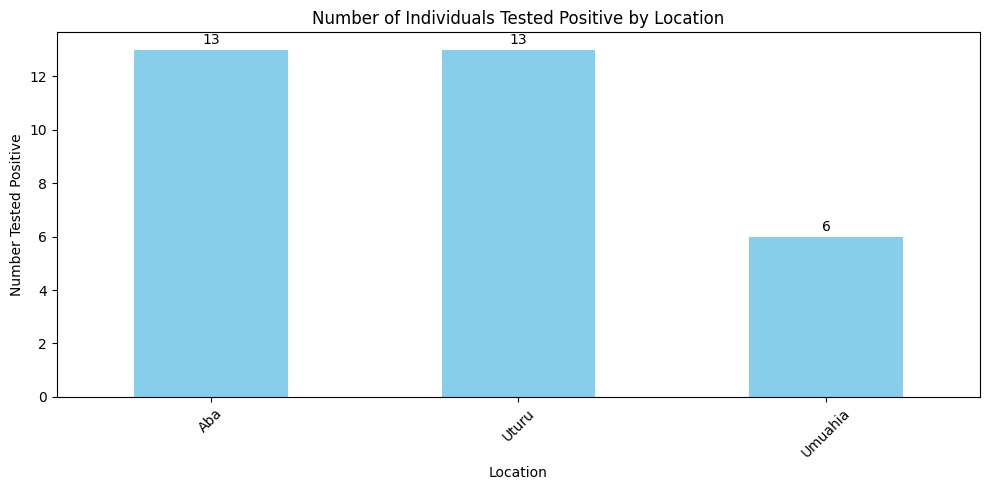

In [25]:
# Group by 'Location' and count the number of positive cases in each location
location_counts = positive_cases['Location'].value_counts()
# Create a column chart
plt.figure(figsize=(10, 5))
location_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Individuals Tested Positive by Location')
plt.xlabel('Location')
plt.ylabel('Number Tested Positive')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
# Add data labels on top of each bar
for i, count in enumerate(location_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [34]:
# Filter for rows where individuals were tested for HIV, positive, and linked to treatment
linked_positive_cases = shre_data[(shre_data['Tested for HIV'] == 'Tested') & 
                              (shre_data['Tested Positive'] == 'Positive') & 
                              (shre_data['Linked to Treatment'] == 'Linked')]

# Create a summary table with counts
summary_table = linked_positive_cases.groupby('Location').size().reset_index(name='Linked to Treatment')

# To display additional counts of those who were tested for HIV, we can also calculate that
tested_counts = shre_data[shre_data['Tested for HIV'] == 'Tested'].groupby('Location').size().reset_index(name='Tested for HIV')

# To display additional counts of those who were tested positive, we can also calculate that
positive_counts = shre_data[shre_data['Tested Positive'] == 'Positive'].groupby('Location').size().reset_index(name='Tested Positive')

# Merge both summaries into one table
final_summary = pd.merge(tested_counts, positive_counts, on='Location', how='left')

final_summary = pd.merge(final_summary, summary_table, on='Location', how='left')

# Fill NaN values with 0 for those locations with no positive cases linked to treatment
final_summary['Linked to Treatment'] = final_summary['Linked to Treatment'].fillna(0)

# Convert counts to integers
final_summary['Linked to Treatment'] = final_summary['Linked to Treatment'].astype(int)

# Display the final summary table
print(final_summary)

  Location  Tested for HIV  Tested Positive  Linked to Treatment
0      Aba              75               13                   13
1  Umuahia              54                6                    6
2    Uturu              64               13                   13
